# Breast Cancer Diagnosis

Predictions of breast cancer with classification models: Logistic Regression, Decision Tree, Random Forest, Gaussian Naive Bayes, and K-Nearest Neighbors. 

## Loading Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Load the dataset

The dataset has labels so we must specify it.

In [3]:
df = pd.read_csv("/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/train.csv", header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocess the dataset

* ID number is not related to the diagnosis, so we must discard it.
* Diagnosis is labeled as M: Malignant (cancer) and B: Benign (harmless tumor). We must label them as binary 0 for Benign and 1 for Malignant.


In [4]:
df.drop('id', axis = 1, inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Not all the features affect the diagnosis. Therefore, we need to look at the correlation matrix to determine which features we should take into consider.

In [5]:
corr_matrix = df.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.717858,0.504769,0.730981,0.690582,0.381223,0.595285,0.661762,0.760854,0.323609,...,0.768089,0.544102,0.775066,0.720822,0.464658,0.594530,0.649052,0.797109,0.425462,0.339353
radius_mean,0.717858,1.000000,0.407997,0.997687,0.988701,0.157216,0.494196,0.642358,0.807675,0.147488,...,0.965813,0.372394,0.962455,0.940199,0.135287,0.391245,0.491507,0.722552,0.168232,0.006134
texture_mean,0.504769,0.407997,1.000000,0.415453,0.394554,0.067310,0.323266,0.360874,0.378942,0.115123,...,0.442264,0.907270,0.445687,0.423662,0.176802,0.351717,0.364508,0.394384,0.174939,0.183761
perimeter_mean,0.730981,0.997687,0.415453,1.000000,0.987348,0.196472,0.547683,0.684381,0.838821,0.185594,...,0.965491,0.379893,0.967494,0.939721,0.166175,0.434540,0.529473,0.751009,0.195875,0.050053
area_mean,0.690582,0.988701,0.394554,0.987348,1.000000,0.164457,0.484606,0.650993,0.806881,0.144267,...,0.956426,0.353573,0.953324,0.951838,0.135621,0.366145,0.478190,0.698530,0.143182,-0.000576
smoothness_mean,0.381223,0.157216,0.067310,0.196472,0.164457,1.000000,0.652626,0.547609,0.567709,0.560367,...,0.207041,0.129094,0.234784,0.198346,0.791942,0.494946,0.464526,0.509391,0.420890,0.507529
compactness_mean,0.595285,0.494196,0.323266,0.547683,0.484606,0.652626,1.000000,0.889258,0.837215,0.626097,...,0.525827,0.329956,0.580427,0.497243,0.551029,0.864277,0.817402,0.816985,0.543998,0.682369
concavity_mean,0.661762,0.642358,0.360874,0.684381,0.650993,0.547609,0.889258,1.000000,0.914659,0.532114,...,0.654175,0.349416,0.694697,0.639596,0.460664,0.737370,0.875073,0.846515,0.438677,0.526217
concave points_mean,0.760854,0.807675,0.378942,0.838821,0.806881,0.567709,0.837215,0.914659,1.000000,0.489086,...,0.815106,0.367806,0.843610,0.792694,0.464382,0.661136,0.742051,0.903032,0.403050,0.373728
symmetry_mean,0.323609,0.147488,0.115123,0.185594,0.144267,0.560367,0.626097,0.532114,0.489086,1.000000,...,0.183932,0.147663,0.220103,0.168501,0.410132,0.499568,0.469528,0.462730,0.716219,0.447976


In [6]:
output_column = ['diagnosis']
input_row_means = ['radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

corr_matrix.loc[input_row_means,output_column]>0.55

,diagnosis
radius_mean,True
texture_mean,False
perimeter_mean,True
area_mean,True
smoothness_mean,False
compactness_mean,True
concavity_mean,True
concave points_mean,True
symmetry_mean,False
fractal_dimension_mean,False


Correlation matrix shows that texture, smoothness, symmetry and fractal dimension is not related to the diagnosis. The rest of the mean values will be included in the model.

Train and test data split

In [7]:
trainset, testset = train_test_split(df, test_size=0.3)

## Classification Model

Classification model function will print the accuracy and cross validation scores for the corresponding model.

In [8]:
def classification_model(model, data, features, output):
    model.fit(data[features], data[output])
    predictions = model.predict(data[features])
    accuracy = metrics.accuracy_score(predictions, data[output])
    
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    kfold = KFold(n_splits=6, shuffle = True)
    score = []
    
    for train, test in kfold.split(data):
        train_features = (data[features].iloc[train,:])
        train_output = data[output].iloc[train]
        
        model.fit(train_features, train_output)
        
        score.append(model.score(data[features].iloc[test,:], data[output].iloc[test]))
        
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(score)))
        
    model.fit(data[features], data[output])
    return predictions

In [9]:
features = ['radius_mean',
'perimeter_mean',
'area_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean']
output = 'diagnosis'

## Models

**Logistic Regression**

In [10]:
model_lr = LogisticRegression()
predictions = classification_model(model_lr, trainset, features, output)

Accuracy: 87.868%
Cross-Validation Score : 80.435%
Cross-Validation Score : 82.609%
Cross-Validation Score : 84.702%
Cross-Validation Score : 86.860%
Cross-Validation Score : 86.821%
Cross-Validation Score : 87.166%


In [11]:
predictions = classification_model(model_lr, testset, features, output)

Accuracy: 93.162%
Cross-Validation Score : 95.000%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.333%
Cross-Validation Score : 92.368%
Cross-Validation Score : 89.684%
Cross-Validation Score : 91.404%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Decision Tree**

In [12]:
model_dt = DecisionTreeClassifier()
predictions = classification_model(model_dt, trainset, features, output)

Accuracy: 100.000%
Cross-Validation Score : 89.130%
Cross-Validation Score : 84.783%
Cross-Validation Score : 86.892%
Cross-Validation Score : 87.391%
Cross-Validation Score : 87.691%
Cross-Validation Score : 87.520%


In [13]:
predictions = classification_model(model_dt, testset, features, output)

Accuracy: 100.000%
Cross-Validation Score : 85.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 85.000%
Cross-Validation Score : 86.118%
Cross-Validation Score : 83.632%
Cross-Validation Score : 83.728%


Over-fitting

**Random Forest**

In [14]:
model_rfc = RandomForestClassifier(n_estimators = 100, min_samples_split=25, max_features = 3)
predictions = classification_model(model_rfc, trainset, features, output)

Accuracy: 94.118%
Cross-Validation Score : 97.826%
Cross-Validation Score : 95.652%
Cross-Validation Score : 93.398%
Cross-Validation Score : 91.715%
Cross-Validation Score : 92.039%
Cross-Validation Score : 90.773%


In [15]:
predictions = classification_model(model_rfc, testset, features, output)

Accuracy: 96.581%
Cross-Validation Score : 100.000%
Cross-Validation Score : 97.500%
Cross-Validation Score : 93.333%
Cross-Validation Score : 93.684%
Cross-Validation Score : 94.947%
Cross-Validation Score : 94.912%


**Gaussian Naive Bayes**

In [16]:
model_gnb = GaussianNB()
predictions = classification_model(model_gnb, trainset, features, output)

Accuracy: 88.971%
Cross-Validation Score : 82.609%
Cross-Validation Score : 86.957%
Cross-Validation Score : 83.897%
Cross-Validation Score : 85.145%
Cross-Validation Score : 86.338%
Cross-Validation Score : 88.615%


In [17]:
predictions = classification_model(model_gnb, testset, features, output)

Accuracy: 93.162%
Cross-Validation Score : 100.000%
Cross-Validation Score : 95.000%
Cross-Validation Score : 95.000%
Cross-Validation Score : 94.934%
Cross-Validation Score : 95.947%
Cross-Validation Score : 92.237%


**K-Neighbors Classifier**

In [18]:
model_knc = KNeighborsClassifier()
predictions = classification_model(model_knc, trainset, features, output)

Accuracy: 87.132%
Cross-Validation Score : 80.435%
Cross-Validation Score : 79.348%
Cross-Validation Score : 84.010%
Cross-Validation Score : 84.674%
Cross-Validation Score : 85.961%
Cross-Validation Score : 85.709%


In [19]:
predictions = classification_model(model_knc, testset, features, output)

Accuracy: 88.889%
Cross-Validation Score : 90.000%
Cross-Validation Score : 85.000%
Cross-Validation Score : 86.667%
Cross-Validation Score : 88.684%
Cross-Validation Score : 88.842%
Cross-Validation Score : 89.825%


## Result

We must consider both accuracy and cross validation scores to choose the best model. According to the results, random forest classifier is the best model to diagnose breast cancer.


In [20]:
dftest = pd.read_csv("/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/test.csv", header = 0)
dftest.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90312,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.38290,0.18250,0.2576,0.07602
1,90317302,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,...,11.38,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722
2,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865
3,903507,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,...,21.20,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190
4,903516,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070


We can see the predictions for the last model.

In [21]:
model = model_rfc
predict_test = model.predict(dftest[features])
predict_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0])

Some features are more important than others. In the random forest classifier, we can see how the model achieved the result. 

[Text(0.4444444444444444, 0.875, 'concave points_mean <= 0.056\ngini = 0.496\nsamples = 71\nvalue = [64, 53]\nclass = B'),
 Text(0.2222222222222222, 0.625, 'compactness_mean <= 0.057\ngini = 0.032\nsamples = 36\nvalue = [61, 1]\nclass = B'),
 Text(0.1111111111111111, 0.375, 'gini = 0.111\nsamples = 11\nvalue = [16, 1]\nclass = B'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [45, 0]\nclass = B'),
 Text(0.6666666666666666, 0.625, 'concavity_mean <= 0.076\ngini = 0.103\nsamples = 35\nvalue = [3, 52]\nclass = M'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = B'),
 Text(0.7777777777777778, 0.375, 'perimeter_mean <= 99.99\ngini = 0.037\nsamples = 33\nvalue = [1, 52]\nclass = M'),
 Text(0.6666666666666666, 0.125, 'gini = 0.245\nsamples = 6\nvalue = [1, 6]\nclass = M'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [0, 46]\nclass = M')]

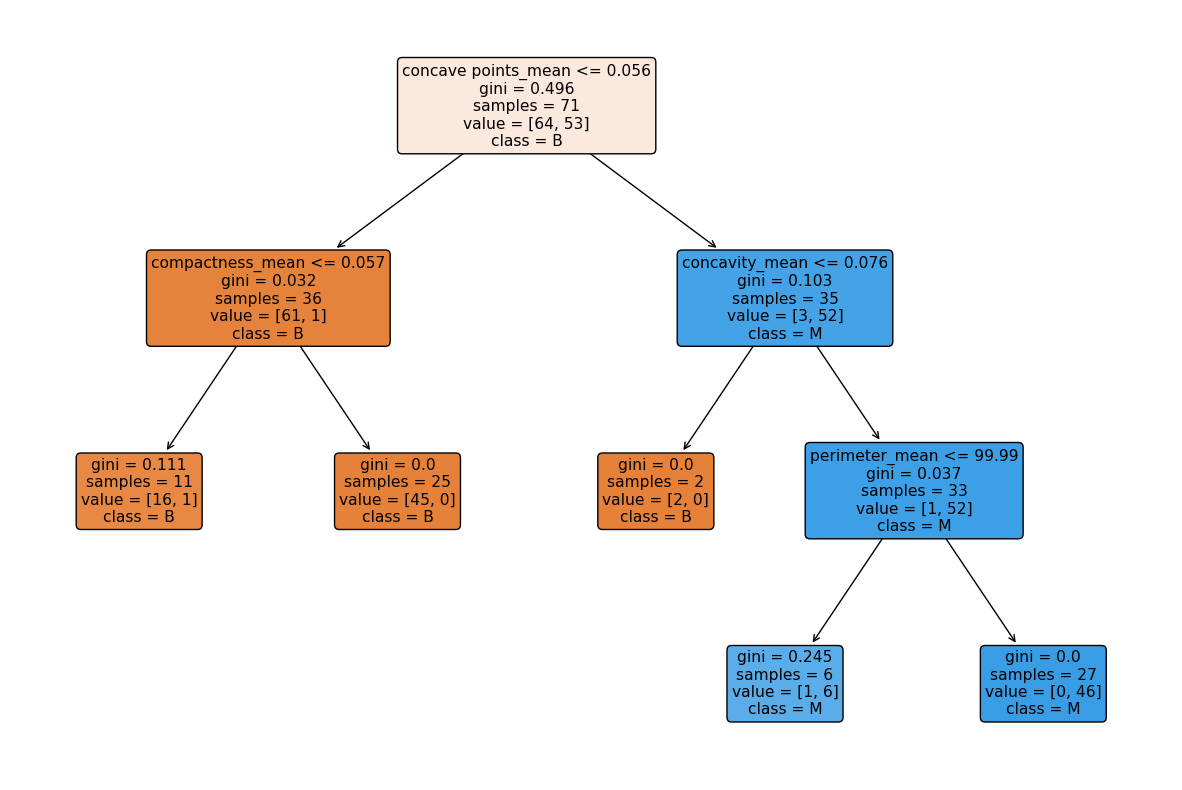

In [22]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=features,
          class_names=["B", "M"],
          filled=True, impurity=True, 
          rounded=True)


In [23]:
submission = pd.DataFrame()
submission['id']= dftest['id']
submission['diagnosis'] = predict_test
submission['diagnosis']= submission['diagnosis'].replace({0:'B',1:'M'})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,diagnosis
0,90312,M
1,90317302,B
2,903483,B
3,903507,M
4,903516,M
